In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(12)

returns = np.random.normal(0.0005, 0.01, 252)
returns = pd.Series(returns)
price = (1 + returns).cumprod() * 100

MA20 =  pd.Series(price).rolling(20).mean()
STD20 = price.rolling(20).std()

zscore = (price - MA20) / STD20

signal = []

for z in zscore:
    if z < -1:
        signal.append(1)      # long
    elif z > 1:
        signal.append(-1)     # short
    else:
        signal.append(0)      # flat

signal = pd.Series(signal)

signal_shifted = signal.shift(1).fillna(0)

strategy_returns = signal_shifted * returns
strategy_cum = (1 + strategy_returns).cumprod()

def max_drawdown(series):
    peak = series.cummax()
    dd = (series - peak) / peak
    return dd.min()

final_value = strategy_cum.iloc[-1]
sharpe = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
mdd = max_drawdown(strategy_cum)

print(f"Final Value: {final_value:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Max Drawdown: {mdd:.4f}")



Final Value: 0.9775
Sharpe Ratio: -0.1326
Max Drawdown: -0.1042


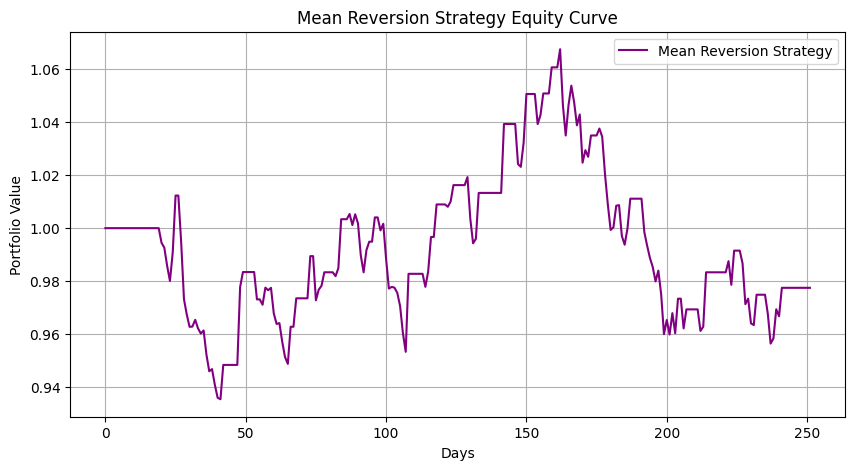

In [3]:
plt.figure(figsize=(10,5))
plt.plot(strategy_cum, label="Mean Reversion Strategy", color="purple")
plt.title("Mean Reversion Strategy Equity Curve")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.legend()
plt.show()